In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def df_dt(x, t, a, b, c, d):
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])
a = 0.1
b = 0.02
c = 0.3
d = 0.01
x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])
tf = 200
N = 800
t = np.linspace(0, tf, N)
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

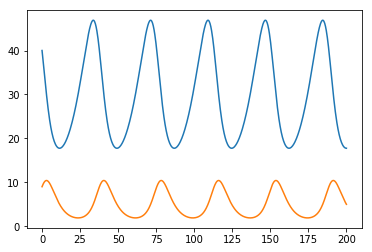

In [3]:
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

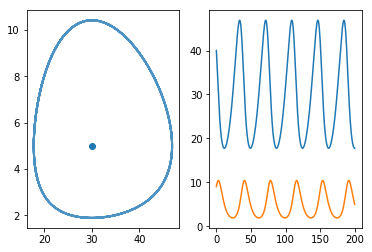

In [5]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x
fig, ax = plt.subplots(1,2)
ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].scatter(c/d, a/b)
levels = (0.5, 0.6, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.775, 0.78, 0.781)
ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')